In [1]:
using HDF5

In [4]:
rf_spectra = read(h5open("resampled_training_spectra.h5", "r")["spectra"]); #reads in the reference spectra 

In [5]:
size(rf_spectra)

(4459, 100)

In [6]:
wl_grid = read(h5open("wl_grid.h5", "r")["wl_grid"]);

In [7]:
Δλ = 7
li_air = 6710
line_mask = li_air - Δλ .< wl_grid .< li_air + Δλ;

In [8]:
line_mask;

In [9]:
test_spectra = read(h5open("test_spectrum.h5", "r")["test_spectrum"]);

In [10]:
test_ivar = read(h5open("test_ivar.h5", "r")["test_ivar"]);

In [11]:
test_spectra = vec(test_spectra);
test_ivar = vec(test_ivar);

In [12]:
using LinearAlgebra, Statistics

In [13]:
include("model.jl")

k = 6;
q = 5;

In [14]:
neighbors = find_neighbors(test_spectra, ref_spectra', k);

In [15]:
pf = predict_spectral_range(test_spectra, test_ivar, ref_spectra', nothing, k, q, line_mask);

In [16]:
mean(pf[line_mask] - test_spectra[line_mask])

0.006436631072622362

In [17]:
pf[line_mask]

233-element Vector{Float64}:
 1.0017314975771752
 1.0074392383703275
 1.013652246637206
 1.0106152502257812
 1.0027517869950646
 0.9975144196387253
 0.9936484036772046
 0.9877739642599672
 0.9666300073859927
 0.9454049298776772
 0.9329171994001441
 0.9281812236787577
 0.940064496373531
 ⋮
 0.9734514808386239
 0.970070706150414
 0.9727515342645792
 0.9766039497389407
 0.9819497055720691
 0.9871613352340466
 0.993710625218542
 0.9987286212855664
 0.997784617197777
 1.0004616735743592
 1.0070733287461153
 1.0079749424780178

In [20]:
using PyPlot

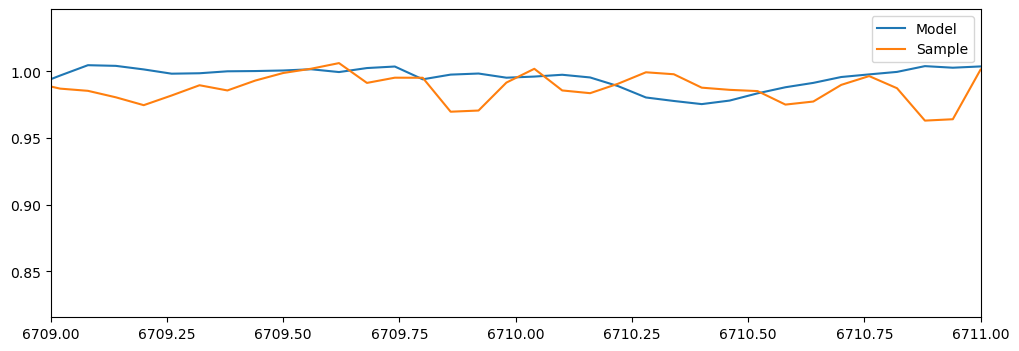

(6709.0, 6711.0)

In [94]:
figure(figsize=(12, 4))
plot(wl_grid[line_mask], pf[line_mask], label="Model")
plot(wl_grid[line_mask], test_spectra[line_mask], label="Sample")
legend()
plt.xlim([6709,6711])
#vline!([6707.85], [0,1.050])

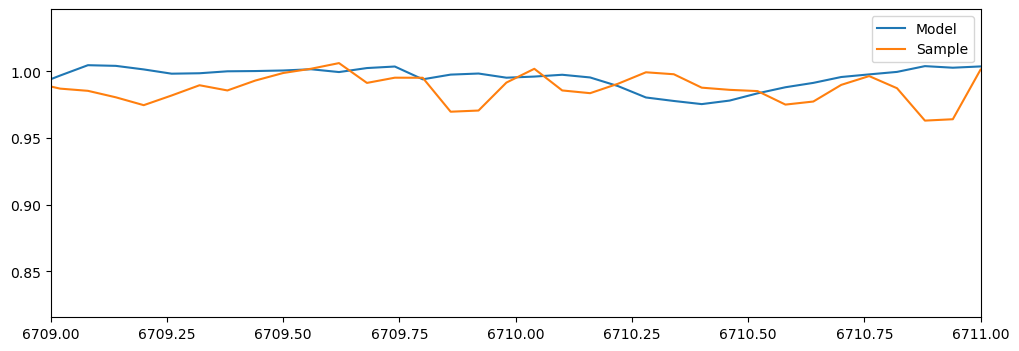

(6709.0, 6711.0)

In [22]:
figure(figsize=(12, 4))
plot(wl_grid[line_mask], pf[line_mask], label="Model")
plot(wl_grid[line_mask], test_spectra[line_mask], label="Sample")
legend()
plt.xlim([6709,6711])
#vline!([6707.85], [0,1.050])